# 17. Legends and Annotations

If you prepare figures for an article you often need to add some annotations to your figure, in particular legends but also specific text such as sub-figure labels. We show these advanced Matplotlib customization here.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize

diams = pd.read_csv('https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/Ecdat/Diamond.csv')
def parabola(x, a, b, c):
    return a * x**2 + b*x + c
fit_params, _ = scipy.optimize.curve_fit(parabola, diams.carat, diams.price)

## Legend

You can manually add a legend at the very end of the process of creating your plot, but here again, with the perspective of not having to go through your entire code to fix things when you do modifications, it's better to add labels that should appear in the legend when creating each part of the plot.

Let's go back to our example:

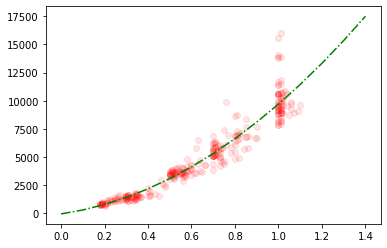

In [2]:
fig, ax = plt.subplots()
ax.plot(diams.carat, diams.price, 'ro', alpha=0.1);
ax.plot(np.arange(0,1.5,0.1), parabola(np.arange(0,1.5,0.1), *fit_params), linestyle='-.', color='green');

Now for both ```plot``` commands, using ```label``` we add the text that we want to appear and at the very end we call ```legend()```:

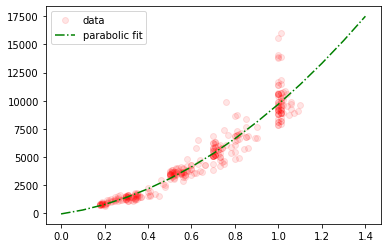

In [3]:
fig, ax = plt.subplots()
ax.plot(diams.carat, diams.price, 'ro', alpha=0.1, label='data');
ax.plot(np.arange(0,1.5,0.1), parabola(np.arange(0,1.5,0.1), *fit_params), linestyle='-.', color='green', label='parabolic fit');
ax.legend();

Matplotlib has automatically created a legend with the correct labels and corresponding markers/lines specifications. We can of course further customize our legend e.g.:

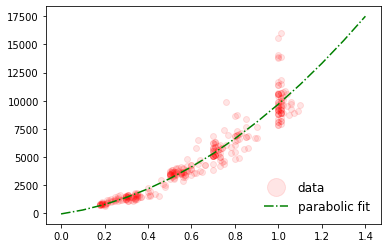

In [4]:
fig, ax = plt.subplots()
ax.plot(diams.carat, diams.price, 'ro', alpha=0.1, label='data');
ax.plot(np.arange(0,1.5,0.1), parabola(np.arange(0,1.5,0.1), *fit_params), linestyle='-.', color='green', label='parabolic fit');
ax.legend(loc='lower right', fontsize=12, frameon=False, markerscale=3)

## Adding text

You might need to add text to lable specific parts of your plot or just to label the entire plot. This can be done with the ```text``` function:

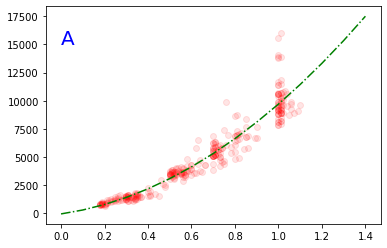

In [5]:
fig, ax = plt.subplots()
ax.plot(diams.carat, diams.price, 'ro', alpha=0.1, label='data');
ax.plot(np.arange(0,1.5,0.1), parabola(np.arange(0,1.5,0.1), *fit_params), linestyle='-.', color='green', label='parabolic fit');
ax.text(x=0, y=15000, s='A', fontdict={'fontsize': 20, 'color': 'blue'});

By default the coordinates are expressed with reference to the data. However, typically for labels like used above, it's better to place text if the reference frame of the axis. For that we need to specificy the ```transform``` parameter. Here the coordinates are bound between 0 and 1:

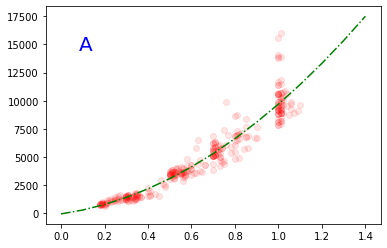

In [6]:
fig, ax = plt.subplots()
ax.plot(diams.carat, diams.price, 'ro', alpha=0.1, label='data');
ax.plot(np.arange(0,1.5,0.1), parabola(np.arange(0,1.5,0.1), *fit_params), linestyle='-.', color='green', label='parabolic fit');
ax.text(x=0.1, y=0.8, s='A', fontdict={'fontsize': 20, 'color': 'blue'}, transform=ax.transAxes);

## Arrow annotations

To point to a specific part of your plot you can also add text with an associated arrow pointing to that place via the ```annotate``` function:

Text(0.8200000000000001, 1468, 'interesting point')

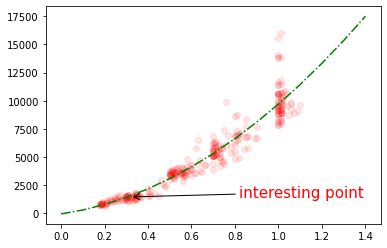

In [7]:
fig, ax = plt.subplots()
ax.plot(diams.carat, diams.price, 'ro', alpha=0.1, label='data');
ax.plot(np.arange(0,1.5,0.1), parabola(np.arange(0,1.5,0.1), *fit_params), linestyle='-.', color='green', label='parabolic fit');
ax.annotate(s='interesting point', xy=(diams.loc[10, 'carat'],diams.loc[10, 'price']), 
            xytext=(diams.loc[10, 'carat']+0.5,diams.loc[10, 'price']), arrowprops={'arrowstyle': '->'}, fontsize=15, color='red')